Derived from https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html with slight modifications

# Filling the area between lines
This example shows how to use `fill_between` to color area between two lines.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

!python --version
print(f'Matplotlib version: {mpl.__version__}')
print(f'Numpy version: {np.__version__}')

Python 3.8.18
Matplotlib version: 3.7.2
Numpy version: 1.24.3


## Basic usage
The parameters *y1* and *y2* can be scalars, indicating a horizontal boundary at the given y-values. If only *y1* is given, *y2* defaults to 0

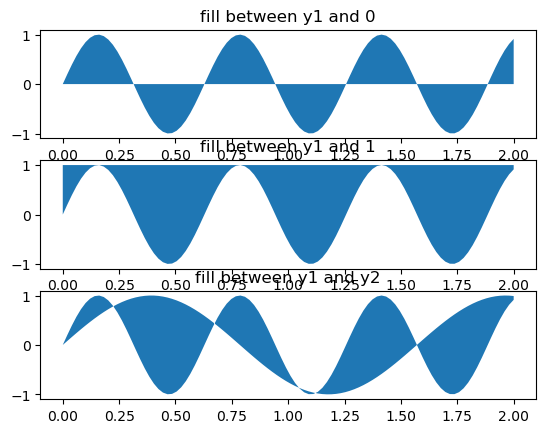

In [6]:
m = 10
x = np.linspace(0,2,100)

fig, ax = plt.subplots(3,1)

ax[0].set_title('fill between y1 and 0')
ax[0].fill_between(x, np.sin(x * m), 0)


ax[1].set_title('fill between y1 and 1')
ax[1].fill_between(x, np.sin(x * m), 1)

ax[2].set_title('fill between y1 and y2')
ax[2].fill_between(x, np.sin(x * m), np.sin(0.4 * x * m))

plt.show()

## Example: Confidence bands
A common application for `fill_between` is the indication of confidence bands.
`fill_between` uses the colors of the color cycle as the fill color. These may be a bit strong when applied to fill areas. It is therefore often a good practice to lighten the color by making the area semi-transparent using *alpha*.

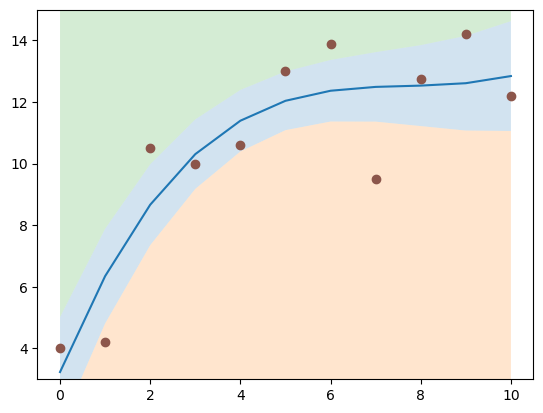

In [13]:
x = np.linspace(0,10,11)
y = [4.0, 4.2, 10.5,10.0,10.6,13.0,13.9,9.5,12.75,14.2,12.2]

# fit a linear curve and estimate its y-value and their error
a, b, c, d = np.polyfit(x, y, deg=3)
y_est = a * x * x * x + b * x * x + c * x + d
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.fill_between(x, 0, y_est - y_err, alpha=0.2)
ax.fill_between(x, 20, y_est + y_err, alpha=0.2)
ax.set_ylim((3, 15))
ax.plot(x, y, 'o', color='tab:brown')

## Selectively filling horizontal regions
The parameter *where* allows to specify the x-ranges to fill. It's a boolean array with the same size as x.

Only x-ranges of contiguous *True* sequences are filled. As a result, the range between neighboring *True* or *False* values is never filled. This often undesired when the data points should represent a contiguous quantity. It is therefore recommended to set `interpolate=True` unless the x-distance of the data points is fine enough so that the above effect is not noticeable. Interpolation approximates the actual x position at which the *where* condition will change and extends the filling up to there.

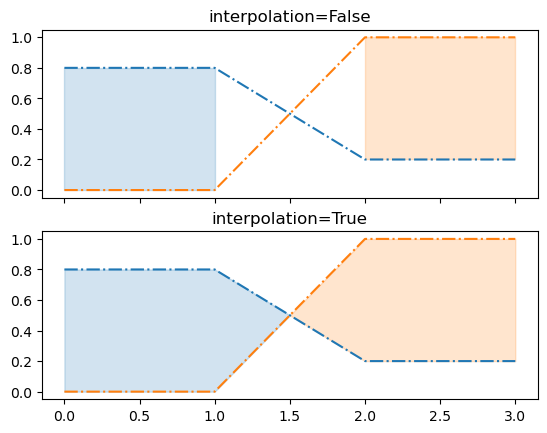

In [20]:
x = np.arange(0,4,1)
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])


fig, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title('interpolation=False')
ax[0].plot(x, y1, color='tab:blue', ls='dashdot')
ax[0].plot(x, y2, color='tab:orange', ls='dashdot')
ax[0].fill_between(x, y2, y1, where=y1 > y2, interpolate=False, color='tab:blue', alpha=0.2)
ax[0].fill_between(x, y1, y2, where=y2 > y1, interpolate=False, color='tab:orange', alpha=0.2)


ax[1].set_title('interpolation=True')
ax[1].plot(x, y1, color='tab:blue', ls='dashdot')
ax[1].plot(x, y2, color='tab:orange', ls='dashdot')
ax[1].fill_between(x, y2, y1, where=y1 > y2, interpolate=True, color='tab:blue', alpha=0.2)
ax[1].fill_between(x, y1, y2, where=y2 > y1, interpolate=True, color='tab:orange', alpha=0.2)


plt.show()

## Selectively marking horizontal regions across the whole Axes
The same selection mechanism can be applied to fill the full vertical heght of the axes. To be independent of y-limits, we add a transform that interprets the x-values in data coordinates and the y-values in axes coordinates.

The following example marks the regions in which the y-data are above a given threshold.

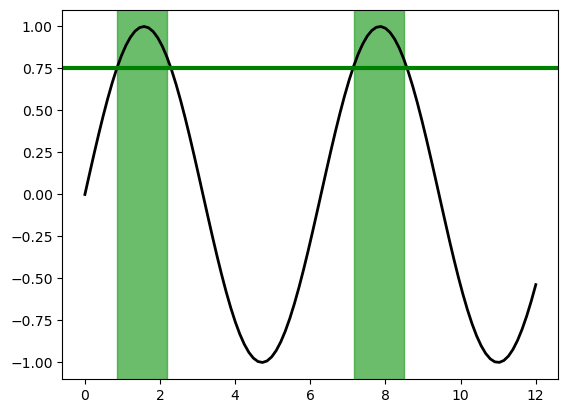

In [34]:
x = np.linspace(0,12,100)
th = 0.75
y = np.sin(x)

fig, ax = plt.subplots()

ax.plot(x, y, color='black', lw=2)
ax.axhline(th, color='green', lw=3)
ax.fill_between(x, -2, 2, where=(y > th), color='tab:green', alpha=0.7)
ax.set_ylim((-1.1,1.1))

plt.show()